# Project 1: SAT & ACT Analysis

## Problem Statement

We have seen over the years that ACT (a competitor) gain considerable market share in the US, with almost 35% of the states reporting 100% participation rates in graduaing high school seniors. The College Board, administrator of the SAT, wishes to increase participation rates to allow SAT to return to its status as the unanimous choice of exit exam. 

## Executive Summary

Brought in as a consultant to help the SAT increase participation rates in the United States. In the last 2 years we observed some traction with the SAT. I aim to analyse the SAT/ACT data from 2017 to 2018 to generate actionable insights for the organisation to keep the momentum going and further increase participation rates.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#read csv files and assign them to variables 
## sat_2017=pd.read_csv('/users/kenny/Desktop/DSI15/projects/project_1/data/sat_2017.csv')
## act_2017=pd.read_csv('/users/kenny/Desktop/DSI15/projects/project_1/data/act_2017.csv')

In [3]:
#read csv files and assign them to variables 
sat_2017=pd.read_csv('../data/sat_2017.csv')
act_2017=pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
#prints first 10 rows of the dataset
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
#prints first 10 rows of the dataset
act_2017.head(10)
#composite is average of 4 score, rounded to nearest whole number: >=0.5 -> round up

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

**Comments on the SAT-data**

The sat_2017 dataset consists of 51 rows and 5 cols. The 5 columns are namely: 
- State
- Participation
- Evidence-Based Reading and Writing
- Math
- Total

Of the 5 columns, all fields are filled with no missing values. 
The respective columns also contains data with the appropriate data types with the exception of:
- Participation, which in my opinion can be stored as a float. 

Based on my understanding of the SAT and its score calculation, all the relevant data seems to be there.

**Comments on the ACT-data**

Relative to the sat_2017 dataset, the act_2017 dataset has an additional line which contains 'national' at act_2017.iloc[0]

The sat_2017 dataset consists of 52 rows and 7 cols. The 7 columns are namely: 
- State
- Participation
- English
- Math
- Reading
- Science
- Composite

Of the 7 columns, all fields are filled with no missing values. 
The respective columns also contains data with the appropriate data types with the exception of:
- participation (explained above)
- composite score. This is calculated by taking the average of the other 4 scores and rounding it to the nearest whole number. Therefore it should also be a float. 
Based on my understanding of the ACT and its score calculation, all the relevant data seems to be there.

For convenience, we will convert all datatypes to float with the exception of State

#### 4a. Does the data look complete? 

In [6]:
#this allows us to check if the data is complete (Non-Null and Count) and in the correct type
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [7]:
#this allows us to check if the data is complete (Non-Null and Count) and in the correct type
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


**Does the data look complete**

Largely, all fields are filled and mostly in the appropriate data types, except those mentioned above.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [8]:
#.desribe() allows us to identify certain outliers in the data, especially in the min/max
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [9]:
#.desribe() allows us to identify certain outliers in the data, especially in the min/max
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


**Maximum/Minimums for test/subtest**

Mins:

SAT - Reading: 482

SAT - Math: 52 --> this seems suspiciously low and could be an outlier. 


ACT - English: 16.3

ACT - Math: 18.0

ACT - Reading: 18.1

ACT - Science: 2.3 --> this seems suspiciously low and could be an outlier. 

Maxs:

SAT - Reading: 644

SAT - Math: 651

ACT - English: 25.5

ACT - Math: 25.3

ACT - Reading: 26.0

ACT - Science: 24.9

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [10]:
#first we identify the outlier
sat_2017[sat_2017['Math']==52]
#the original value should be 1060-536=524
#setting the value to 524
sat_2017.loc[20,'Math']=524
#checking that the changes are made to the df
sat_2017.loc[20]

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                       524
Total                                     1060
Name: 20, dtype: object

In [11]:
#first we identify the outlier
act_2017[act_2017['Science']==2.3]
#the original value should be 23.8 (calculated based on other test scores and the composite score)
#setting the value to 23.8
act_2017.loc[21,'Science']=23.8
#checking that the changes are made to the df
act_2017.loc[21]

State            Maryland
Participation         28%
English              23.3
Math                 23.1
Reading              24.2
Science              23.8
Composite            23.6
Name: 21, dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [12]:
#we use .info() -> Dtype to check the data types
print(sat_2017.info())
print(act_2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB
None


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Findings from datatypes**

- Relative to the act_2017 dataset, it is lacking a line which contains an additional line for 'national' at act_2017.iloc[0]
- Both datasets show 'Participation' data type as str which should instead be a float
- The composite score of ACT should also be a float since it is the rounded average of the other scores

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [13]:
#function that will allow you to convert participation rates to an appropriate numeric type
def pct_map_flt(x):
    try:
        return float(x.replace('%',''))/100  #we remove the %, float the str and divide it by 100
    except AttributeError:
        print("Oops!  That's not a string")  #we use try and except to catch errors if the original data type is not a str

In [14]:
#apply function to sat participation rates
sat_2017['Participation']=sat_2017['Participation'].map(pct_map_flt)

In [15]:
#apply function to act participation rates
act_2017['Participation']=act_2017['Participation'].map(pct_map_flt)

In [16]:
#check if data was successfully changed
print(sat_2017.head())
print(sat_2017.head())

        State  Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama           0.05                                 593   572   1165
1      Alaska           0.38                                 547   533   1080
2     Arizona           0.30                                 563   553   1116
3    Arkansas           0.03                                 614   594   1208
4  California           0.53                                 531   524   1055
        State  Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama           0.05                                 593   572   1165
1      Alaska           0.38                                 547   533   1080
2     Arizona           0.30                                 563   553   1116
3    Arkansas           0.03                                 614   594   1208
4  California           0.53                                 531   524   1055


- Fix any individual values preventing other columns from being the appropriate type.

In [17]:
#identify the row containing '20.2x', which threw an error when we tried to convert "Composite" to float
act_2017[act_2017['Composite']=='20.2x']
#replace it with the correct value -> 20.20
act_2017.loc[51,'Composite']=20.20
#check that changes have been made
act_2017.loc[51,'Composite']

20.2

- Finish your data modifications by making sure the columns are now typed appropriately.

In [18]:
#for convenience, we will change all columns to float in sat_2017

sat_2017['Evidence-Based Reading and Writing']=sat_2017['Evidence-Based Reading and Writing'].astype('float')
sat_2017['Math']=sat_2017['Math'].astype('float')
sat_2017['Total']=sat_2017['Total'].astype('float')

In [19]:
#convert composite in act_2017
act_2017['Composite']=act_2017['Composite'].astype('float')
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


- Display the data types again to confirm they are correct.

In [20]:
#Code:
print(sat_2017.info())
print(act_2017.info())
#see that all data here are float except state

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null float64
Math                                  51 non-null float64
Total                                 51 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB
None


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [21]:
#show current column sat_2017 column names
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [22]:
#since we will eventually combine sat and act data, as well as 2017 and 2018 data, I have chosen to include these explictly in the col names
sat_2017.rename(columns={
    "State" : "state",                                      #current col name: new col name
    "Participation" : "sat_participation_pct_2017",
    "Evidence-Based Reading and Writing" : "sat_reading_writing_2017",
    "Math" : "sat_math_2017",
    "Total" : "sat_total_2017"
},inplace=True)                                             #we set inplace=True to allow changes to be saved

#double check the changes were done
sat_2017.head()

,state,sat_participation_pct_2017,sat_reading_writing_2017,sat_math_2017,sat_total_2017
0,Alabama,0.05,593.0,572.0,1165.0
1,Alaska,0.38,547.0,533.0,1080.0
2,Arizona,0.30,563.0,553.0,1116.0
3,Arkansas,0.03,614.0,594.0,1208.0
4,California,0.53,531.0,524.0,1055.0


In [23]:
#show current column act_2017 column names
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [24]:
#since we will eventually combine sat and act data, as well as 2017 and 2018 data, I have chosen to include these explictly in the col names
act_2017.rename(columns={
    "State" : "state",                                #current col name: new col name
    "Participation" : "act_participation_pct_2017",
    "English" : "act_english_2017",
    "Math" : "act_math_2017",
    "Reading" : "act_reading_2017",
    "Science" : "act_science_2017",
    "Composite" : "act_composite_2017"
},inplace=True)                                      #we set inplace=True to allow changes to be saved

#double check the changes were done
act_2017.head()

,state,act_participation_pct_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Example|Description|
|---|---|---|---|---|
|**state**|*object*|SAT|Alabama|This indicates the state in which the pariticipants were from. |
|**sat_participation_pct_2017**|*float*|SAT|0.05|The percentage of cohort eligible in the state that participated in the SAT (the value shown is a fraction. This means 0.05 is intepreted as 5%). |
|**sat_reading_writing_2017**|*integer*|SAT|593|The score is scaled from the sum of the raw scores of the Reading as well as the Writing and Language Test. |
|**sat_math_2017**|*integer*|SAT|572|The score is scaled from the sum of the raw scores of the Math (non - calculator) as well as the Math (Calculator) Test. |
|**sat_total_2017**|*integer*|SAT|1165|This is a sum of the scaled scores of the 2 test scores above. |

|Feature|Type|Dataset|Example|Description|
|---|---|---|---|
|**state**|*object*|SAT|Alabama|This indicates the state in which the pariticipants were from. |
|**act_participation_pct_2017**|*float*|SAT|1.00|The percentage of cohort eligible in the state that participated in the SAT (the value shown is a fraction. This means 1.00 is intepreted as 100%). |
|**act_english_2017**|*float*|SAT|18.9|Each individual test of the ACT is scored on a scale of 1–36. The higher the score, the better.|
|**act_math_2017**|*float*|SAT|18.4|Each individual test of the ACT is scored on a scale of 1–36. The higher the score, the better.|
|**act_reading_2017**|*float*|SAT|19.7|Each individual test of the ACT is scored on a scale of 1–36. The higher the score, the better.|
|**act_science_2017**|*float*|SAT|19.4|Each individual test of the ACT is scored on a scale of 1–36. The higher the score, the better.|
|**act_composite_2017**|*float*|SAT|19.2|The composite score is calculated by taking the average of the 4 tests and rounding it up or down accordingly (If the average score is more than 0.5, it is rounded up)|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [25]:
#remove the first row in act_2017 that contains the national averages
act_2017.drop(0,axis=0,inplace=True)
#see that the first row is now index 1, instead of 0
act_2017.head()

,state,act_participation_pct_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [26]:
#we merge the dataframes using state as the key
#by selecting how='left', we position the sat scores first, then the act scores
combined_2017=pd.merge(sat_2017,act_2017,how='left')

#check to see if the merge is successful
combined_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
state                         51 non-null object
sat_participation_pct_2017    51 non-null float64
sat_reading_writing_2017      51 non-null float64
sat_math_2017                 51 non-null float64
sat_total_2017                51 non-null float64
act_participation_pct_2017    51 non-null float64
act_english_2017              51 non-null float64
act_math_2017                 51 non-null float64
act_reading_2017              51 non-null float64
act_science_2017              51 non-null float64
act_composite_2017            51 non-null float64
dtypes: float64(10), object(1)
memory usage: 4.8+ KB


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [27]:
#we will save it to the data folder under the name 'combined_2017'. 
## combined_2017.to_csv('/users/kenny/Desktop/DSI15/projects/project_1/data/combined_2017.csv',index=False)

In [28]:
#we will save it to the data folder under the name 'combined_2017'. 
combined_2017.to_csv('../data/combined_2017.csv',index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [29]:
#since we have 2 files for act_2018, we read both to check for differences
#we will be using data from act_2018_updated.csv since it seems to have more data than the act_2018.csv file as well as more accurate data(i.e. act_2018 has repeatred 'Maine')
#since the csv file is no longer required, I have removed it from the data folder

In [30]:
#import data from csv for both 2018 SAT and ACT
## sat_2018=pd.read_csv('/users/kenny/Desktop/DSI15/projects/project_1/data/sat_2018.csv')
## act_2018=pd.read_csv('/users/kenny/Desktop/DSI15/projects/project_1/data/act_2018_updated.csv')

In [31]:
#import data from csv for both 2018 SAT and ACT
sat_2018=pd.read_csv('../data/sat_2018.csv')
act_2018=pd.read_csv('../data/act_2018_updated.csv')

In [32]:
#checking for any missing values and data types
sat_2018.info()
act_2018.info()
#no missing values
#we will proceed to convert all to float except state

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [33]:
#since sat_2018 has the same header and data type as sat_2017, we can use the fucntion defined earlier to convert the datatype to float.
sat_2018['Participation']=sat_2018['Participation'].map(pct_map_flt)
#check changes have been applied
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [34]:
#we will change all columns to float in sat_2018

sat_2018['Evidence-Based Reading and Writing']=sat_2018['Evidence-Based Reading and Writing'].astype('float')
sat_2018['Math']=sat_2018['Math'].astype('float')
sat_2018['Total']=sat_2018['Total'].astype('float')

#check to see changes were saved to variable
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null float64
Math                                  51 non-null float64
Total                                 51 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [35]:
#since the act_2018 participation rate column is named differently and has a different data type (int), we will do it manually
act_2018['Percentage of Students Tested']=act_2018['Percentage of Students Tested'].astype('float')/100
#checking that our changes have been made to the df
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.27,22.7,22.5,22.5,23.0,22.1


In [36]:
#following the naming convention we established earlier, we will rename sat_2018 in a similar fashion
sat_2018.rename(columns={
    "State" : "state",
    "Participation" : "sat_participation_pct_2018",
    "Evidence-Based Reading and Writing" : "sat_reading_writing_2018",
    "Math" : "sat_math_2018",
    "Total" : "sat_total_2018"
},inplace=True)

#double check the changes were done
sat_2018.head()

,state,sat_participation_pct_2018,sat_reading_writing_2018,sat_math_2018,sat_total_2018
0,Alabama,0.06,595.0,571.0,1166.0
1,Alaska,0.43,562.0,544.0,1106.0
2,Arizona,0.29,577.0,572.0,1149.0
3,Arkansas,0.05,592.0,576.0,1169.0
4,California,0.60,540.0,536.0,1076.0


In [37]:
#rename act_2018_updated columns
act_2018.rename(columns={
    'State' : 'state',
    'Percentage of Students Tested' : 'act_participation_pct_2018',
    'Average Composite Score' : 'act_composite_2018',
    'Average English Score' : 'act_english_2018',
    'Average Math Score' : 'act_math_2018',
    'Average Reading Score' : 'act_reading_2018',
    'Average Science Score' : 'act_science_2018',
},inplace=True)
act_2018.head()

,state,act_participation_pct_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.27,22.7,22.5,22.5,23.0,22.1


In [38]:
#shift composite col to the end for act_2018_updated
act_2018=act_2018[[
    'state',
    'act_participation_pct_2018',
    'act_english_2018',
    'act_math_2018',
    'act_reading_2018',
    'act_science_2018',
    'act_composite_2018'
]]
act_2018.head()

,state,act_participation_pct_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
0,Alabama,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4
4,California,0.27,22.5,22.5,23.0,22.1,22.7


In [39]:
#check for suspicious values
sat_2018.describe()
act_2018.describe()
#no outliers detected

,act_participation_pct_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.616471,20.988235,21.125490,22.015686,21.345098,21.486275
std,0.340810,2.446356,2.035765,2.167245,1.870114,2.106278
min,0.070000,16.600000,17.800000,18.000000,17.900000,17.700000
25%,0.285000,19.100000,19.400000,20.450000,19.850000,19.950000
50%,0.660000,20.200000,20.700000,21.600000,21.100000,21.300000
75%,1.000000,23.700000,23.150000,24.100000,23.050000,23.550000
max,1.000000,26.000000,25.200000,26.100000,24.900000,25.600000


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [40]:
#combine 2018 data into combined_2018
combined_2018=pd.merge(sat_2018,act_2018,how='left')

In [41]:
#combine 2017 and 2018 data
final=pd.merge(combined_2017,combined_2018,how='left')
#check all columns, data and data types are correct
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
state                         51 non-null object
sat_participation_pct_2017    51 non-null float64
sat_reading_writing_2017      51 non-null float64
sat_math_2017                 51 non-null float64
sat_total_2017                51 non-null float64
act_participation_pct_2017    51 non-null float64
act_english_2017              51 non-null float64
act_math_2017                 51 non-null float64
act_reading_2017              51 non-null float64
act_science_2017              51 non-null float64
act_composite_2017            51 non-null float64
sat_participation_pct_2018    51 non-null float64
sat_reading_writing_2018      51 non-null float64
sat_math_2018                 51 non-null float64
sat_total_2018                51 non-null float64
act_participation_pct_2018    51 non-null float64
act_english_2018              51 non-null float64
act_math_2018                 51 non-null float6

In [42]:
#save to csv
## final.to_csv('/users/kenny/Desktop/DSI15/projects/project_1/data/final.csv',index=False)

In [43]:
#save to csv
final.to_csv('../data/final.csv',index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [44]:
#Code:
final.describe().transpose()
#phone call: limit to 2 dp ->messy and not meaningful

,count,mean,std,min,25%,50%,75%,max
sat_participation_pct_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_reading_writing_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_math_2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
act_participation_pct_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_english_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_math_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_reading_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_science_2017,51.0,21.462745,1.753392,18.20,19.950,21.30,23.200,24.9
act_composite_2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [45]:
def st_dv(series):
    sum_x_minus_mean_sq=0                   #we use this variable to sum the difference for each (x-u)**2. 
    for i in range(len(final['state'])):    #we loop through each state to sum
        try:                                #we use the try loop to avoid typeerror when the 'state' series is put into the function
            sum_x_minus_mean_sq+=(final[series][i]-final[series].mean())**2
        except TypeError:
            continue
                                            #we multiply by 1/n and sqrt it
    return (sum_x_minus_mean_sq*(1/len(final['state'])))**0.5

In [46]:
st_dv('sat_participation_pct_2017')

0.3492907076664507

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [47]:
st_dv_cols={series : st_dv(series) for series in final}
st_dv_cols

{'state': 0.0,
 'sat_participation_pct_2017': 0.3492907076664507,
 'sat_reading_writing_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_total_2017': 91.58351056778743,
 'act_participation_pct_2017': 0.3182417575123181,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7361170088327353,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_pct_2018': 0.3694661922353942,
 'sat_reading_writing_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433,
 'act_participation_pct_2018': 0.33745194881997503,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.015707255555717,
 'act_reading_2018': 2.145891884510421,
 'act_science_2018': 1.8516885484833543,
 'act_composite_2018': 2.0855261815801147}

In [48]:
#check np.std
np.std(final['sat_participation_pct_2017'])

0.3492907076664507

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

**Answer: **

No. It does not match up with pandas describe function. This is because the ddof in the pandas describe function is by default equals to 1. This means that it divides by 1/(n-1) instead of 1/n. 
It matches up with the np.std function which by default has a ddof of 0 (as shown above). 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### Trend 1: Inverse relationship between Participation rates of SAT and ACT

In [49]:
#highest sat_participation_pct_2017
final.sort_values('sat_participation_pct_2017',ascending=False)['state'].head(5)

8     District of Columbia
22                Michigan
6              Connecticut
7                 Delaware
29           New Hampshire
Name: state, dtype: object

In [50]:
#highest sat_participation_pct_2018
final.sort_values('sat_participation_pct_2018',ascending=False)['state'].head(5)

5        Colorado
6     Connecticut
7        Delaware
22       Michigan
12          Idaho
Name: state, dtype: object

In [51]:
#lowest act_participation_pct_2017
final.sort_values('act_participation_pct_2017',ascending=False)['state'].tail(5)

38     Pennsylvania
39     Rhode Island
7          Delaware
29    New Hampshire
19            Maine
Name: state, dtype: object

In [52]:
#lowest act_participation_pct_2018
final.sort_values('act_participation_pct_2018',ascending=False)['state'].tail(5)

38     Pennsylvania
7          Delaware
29    New Hampshire
39     Rhode Island
19            Maine
Name: state, dtype: object

#### Evidence 1a: High SAT Participation and Low ACT Participation
In 2017, we can see that the following states show an inverse relationship between the sat and act participation rates.
- New Hampshire
- Delare 


Again in 2018, Delaware appears here for high sat participation and low act participation in 2018

In [53]:
#lowest sat_participation_pct_2017
final.sort_values('sat_participation_pct_2017',ascending=False)['state'].tail(5)

3         Arkansas
50         Wyoming
34    North Dakota
24     Mississippi
15            Iowa
Name: state, dtype: object

In [54]:
#lowest sat_participation_pct_2018
final.sort_values('sat_participation_pct_2018',ascending=False)['state'].tail(5)

24     Mississippi
15            Iowa
49       Wisconsin
50         Wyoming
34    North Dakota
Name: state, dtype: object

In [55]:
#highest act_participation_pct_2017
final.sort_values('act_participation_pct_2017',ascending=False)['state'].head(5)

0       Alabama
17     Kentucky
49    Wisconsin
44         Utah
42    Tennessee
Name: state, dtype: object

In [56]:
#highest act_participation_pct_2018
final.sort_values('act_participation_pct_2018',ascending=False)['state'].head(5)

0       Alabama
17     Kentucky
49    Wisconsin
44         Utah
42    Tennessee
Name: state, dtype: object

#### Evidence 1b: Low SAT Participation and High ACT Participation
Wisconsin has a high act participation rate and low sat participation in 2018

### Trend 2: Inverse relationship between Participation rates and Total/Composite scores

In [57]:
#highest sat_total_2017 score
final.sort_values('sat_total_2017',ascending=False)['state'].head(5)

23    Minnesota
49    Wisconsin
15         Iowa
25     Missouri
16       Kansas
Name: state, dtype: object

In [58]:
#lowest sat_participation_pct_2017
final.sort_values('sat_participation_pct_2017',ascending=False)['state'].tail(5)

3         Arkansas
50         Wyoming
34    North Dakota
24     Mississippi
15            Iowa
Name: state, dtype: object

#### Evidence 2a: High SAT Total score and Low SAT Participation

Iowa has one of the highest sat total score in 2017 while having the lowest participation rate in the same year. 

In [59]:
#lowest sat_total_2017
final.sort_values('sat_total_2017',ascending=False)['state'].tail(5)

19                   Maine
12                   Idaho
22                Michigan
7                 Delaware
8     District of Columbia
Name: state, dtype: object

In [60]:
#highest sat_participation_pct_2017
final.sort_values('sat_participation_pct_2017',ascending=False)['state'].head(5)

8     District of Columbia
22                Michigan
6              Connecticut
7                 Delaware
29           New Hampshire
Name: state, dtype: object

#### Evidence 2b: Low SAT Total score and High SAT Participation

- Michigan
- Delaware
- District of Columbia 

These states have some of the highest participation rates in 2017 while being in the bottom 3 in terms of total score for the same year. 

In [61]:
#highest act_composite_2017
final.sort_values('act_composite_2017',ascending=False)['state'].head(5)

29           New Hampshire
21           Massachusetts
6              Connecticut
19                   Maine
8     District of Columbia
Name: state, dtype: object

In [62]:
#lowest act_participation_pct_2017
final.sort_values('act_participation_pct_2017',ascending=False)['state'].tail(5)

38     Pennsylvania
39     Rhode Island
7          Delaware
29    New Hampshire
19            Maine
Name: state, dtype: object

#### Evidence 2c: High ACT Total score and Low ACT Participation
- New Hampshire
- Maine 

have high composite scores and low participation rates. 

In [63]:
#lowest act_composite_2017
final.sort_values('act_composite_2017',ascending=False)['state'].tail(5)

33    North Carolina
11            Hawaii
40    South Carolina
24       Mississippi
28            Nevada
Name: state, dtype: object

In [64]:
#highest act_participation_pct_2017
final.sort_values('act_participation_pct_2017',ascending=False)['state'].head(5)

0       Alabama
17     Kentucky
49    Wisconsin
44         Utah
42    Tennessee
Name: state, dtype: object

Doesnt seem to have a trend here

In [65]:
#highest sat_total_2018
final.sort_values('sat_total_2018',ascending=False)['state'].head(5)

23       Minnesota
49       Wisconsin
34    North Dakota
15            Iowa
16          Kansas
Name: state, dtype: object

In [66]:
#lowest sat_participation_pct_2018
final.sort_values('sat_participation_pct_2018',ascending=False)['state'].tail(5)

24     Mississippi
15            Iowa
49       Wisconsin
50         Wyoming
34    North Dakota
Name: state, dtype: object

#### Evidence 2d: High SAT Total score and Low SAT Participation
North Dakota and Iowa display an inverse relationship between participation rates and total scores in the SAT

In [67]:
#lowest sat_total_2018
final.sort_values('sat_total_2018',ascending=False)['state'].tail(5)

11                  Hawaii
12                   Idaho
48           West Virginia
7                 Delaware
8     District of Columbia
Name: state, dtype: object

In [68]:
#highest sat_participation_pct_2018
final.sort_values('sat_participation_pct_2018',ascending=False)['state'].head(5)

5        Colorado
6     Connecticut
7        Delaware
22       Michigan
12          Idaho
Name: state, dtype: object

#### Evidence 2e: Low SAT Total score and High SAT Participation
Similarly, Michigan seems to support the inverse relationship between participation rates and total scores in the SAT

In [69]:
#lowest act_participation_pct_2018
final.sort_values('act_participation_pct_2018',ascending=False)['state'].tail(5)

38     Pennsylvania
7          Delaware
29    New Hampshire
39     Rhode Island
19            Maine
Name: state, dtype: object

In [70]:
#highest act_composite_2018
final.sort_values('act_composite_2018',ascending=False)['state'].head(5)

6       Connecticut
21    Massachusetts
29    New Hampshire
32         New York
22         Michigan
Name: state, dtype: object

#### Evidence 2f: High ACT Total score and Low ACT Participation

New Hampshire shows the inverse relationship between act participation and composite scores again

In [71]:
#highest act_participation_pct_2018
final.sort_values('act_participation_pct_2018',ascending=False)['state'].head(5)

0       Alabama
17     Kentucky
49    Wisconsin
44         Utah
42    Tennessee
Name: state, dtype: object

In [72]:
#lowest act_composite_2018
final.sort_values('act_composite_2018',ascending=False)['state'].tail(5)

0            Alabama
11            Hawaii
24       Mississippi
40    South Carolina
28            Nevada
Name: state, dtype: object

#### Evidence 2g: Low ACT Total score and High ACT Participation
Alabama shows the inverse relationship between act participation and composite scores again

### Do any states with 100% participation on a given test have a rate change year-to-year?

In [73]:
#rate change in sat_participation_pct
final[(final['sat_participation_pct_2017']==1)&(final['sat_participation_pct_2018']!=1)][['state','sat_participation_pct_2017','sat_participation_pct_2018']]

,state,sat_participation_pct_2017,sat_participation_pct_2018
8,District of Columbia,1.0,0.92


In [74]:
#rate change in sat_participation_pct
final[(final['act_participation_pct_2017']==1)&(final['act_participation_pct_2018']!=1)][['state','act_participation_pct_2017','act_participation_pct_2018']]

,state,act_participation_pct_2017,act_participation_pct_2018
5,Colorado,1.0,0.30
23,Minnesota,1.0,0.99


#### Observation: 
Colarado seems to have fallen by a huge margin

### Do any states show have >50% participation on both tests either year?

In [75]:
#>50 for both test in 2017
final[(final['sat_participation_pct_2017']>0.5)&(final['act_participation_pct_2017']>0.5)][['state','sat_participation_pct_2017','act_participation_pct_2017']]

,state,sat_participation_pct_2017,act_participation_pct_2017
9,Florida,0.83,0.73
10,Georgia,0.61,0.55
11,Hawaii,0.55,0.90


In [76]:
#>50 for both test in 2018
final[(final['sat_participation_pct_2018']>0.5)&(final['act_participation_pct_2018']>0.5)][['state','sat_participation_pct_2018','act_participation_pct_2018']]

,state,sat_participation_pct_2018,act_participation_pct_2018
9,Florida,0.56,0.66
10,Georgia,0.70,0.53
11,Hawaii,0.56,0.89
33,North Carolina,0.52,1.00
40,South Carolina,0.55,1.00


#### Observation: 
Hawaii, North and South Carolina have interestingly high participation rates for ACT yet relatively high rates for SAT

### Trend summary:
#### 2 Main Trends: 
- Inverse relationship between Participation rates of SAT and ACT
- Inverse relationship between Participation rates and Total/Composite Scores

#### Other observation: 
- Colorado showed a huge swing from ACT to SAT 
- Some states have high participation rates of ACT and relatively high rates for SAT

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

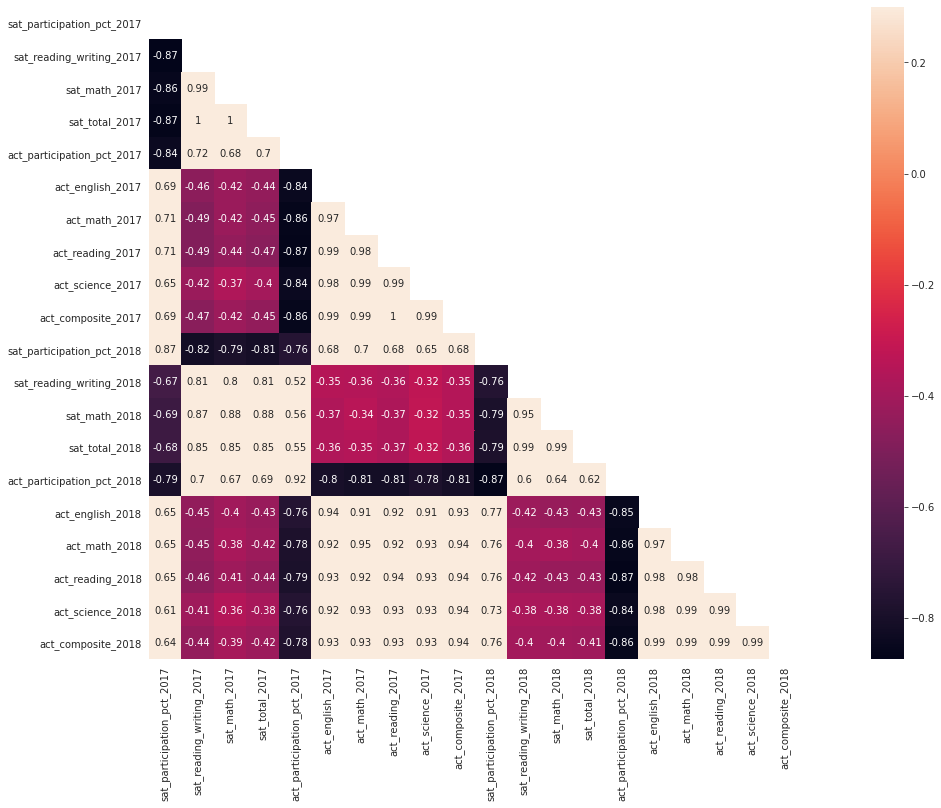

In [77]:
# Establish size of figure.
plt.figure(figsize=(25,12))

corr = final.corr()

# Set up mask to be "True" in the upper triangle. (triu)
#use (tril) for lower triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

#### Observation: 
The R-squared value of -0.87 supports our theory of inverse relationships of high SAT participation rates and low SAT total scores in 2017

The R-squared value of -0.84 supports our theory of inverse relationships of high SAT participation rates and low ACT participation rates in 2017

The 2 trends observed above in both SAT and ACT data in both years are also demonstrated here, showing a strong negatiuve relationship

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [78]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=(12,12),nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],label=list_of_xlabels[i]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('Number of States')
        ax[i].legend(loc='upper right')
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

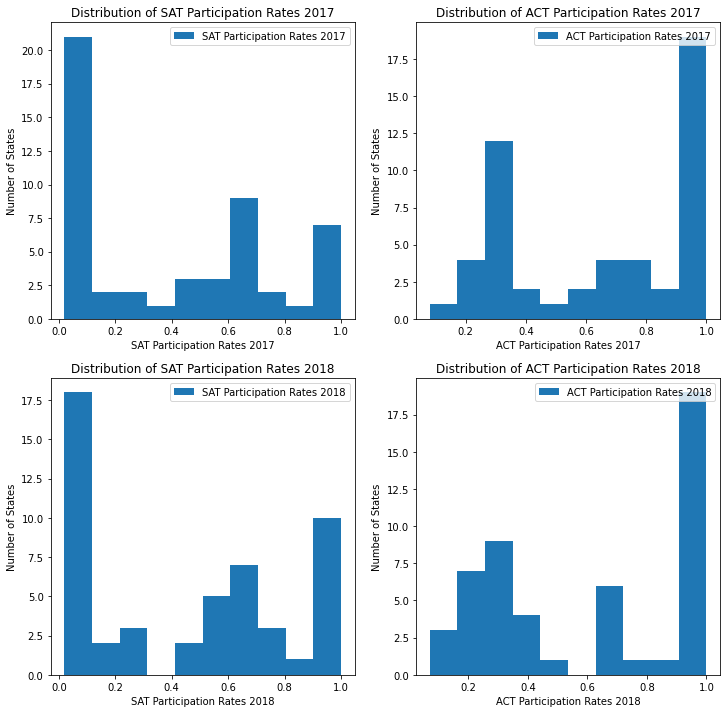

In [79]:
#create our df for the plot
part_pct=final.iloc[:,[1,5,11,15]]

subplot_histograms(part_pct,part_pct.columns.to_list(),[
    'Distribution of SAT Participation Rates 2017',
    'Distribution of ACT Participation Rates 2017',
    'Distribution of SAT Participation Rates 2018',
    'Distribution of ACT Participation Rates 2018'],[
    'SAT Participation Rates 2017',
    'ACT Participation Rates 2017',
    'SAT Participation Rates 2018',
    'ACT Participation Rates 2018'
])

#### Observation:

From 2017-2018:
- SAT participation rates have increased, with less states in the 0-20% range
- ACT participation rates seems to have fallen abit. 

This is inline with Trend 1: Inverse relationship between Participation rates of SAT and ACT 

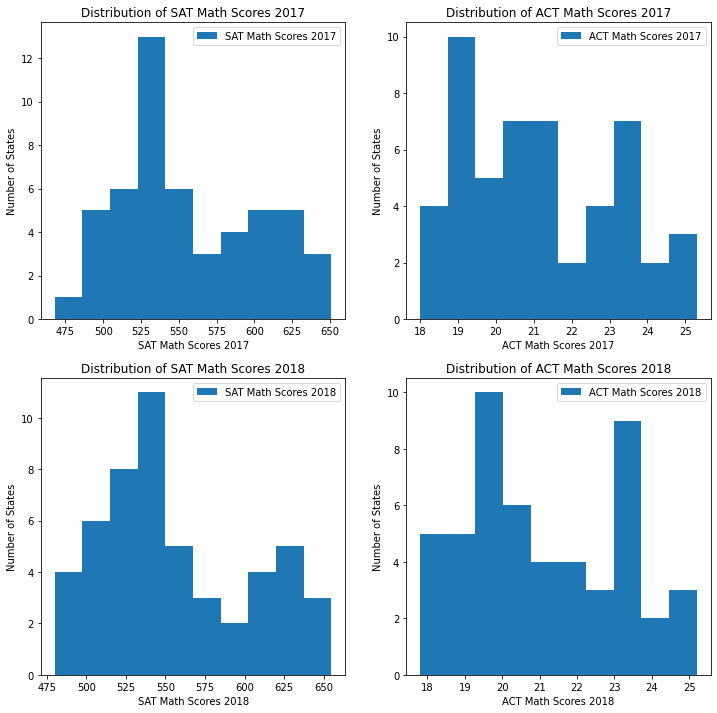

In [80]:
#create our df for the plot
math=final.iloc[:,[3,7,13,17]]

subplot_histograms(math,math.columns.to_list(),[
    'Distribution of SAT Math Scores 2017',
    'Distribution of ACT Math Scores 2017',
    'Distribution of SAT Math Scores 2018',
    'Distribution of ACT Math Scores 2018'],[
    'SAT Math Scores 2017',
    'ACT Math Scores 2017',
    'SAT Math Scores 2018',
    'ACT Math Scores 2018'
])

#### Observation:

From 2017-2018:
- SAT math scores have remained relatively the same, with majority below the median. 
- ACT math scores seems to have fallen abit. 

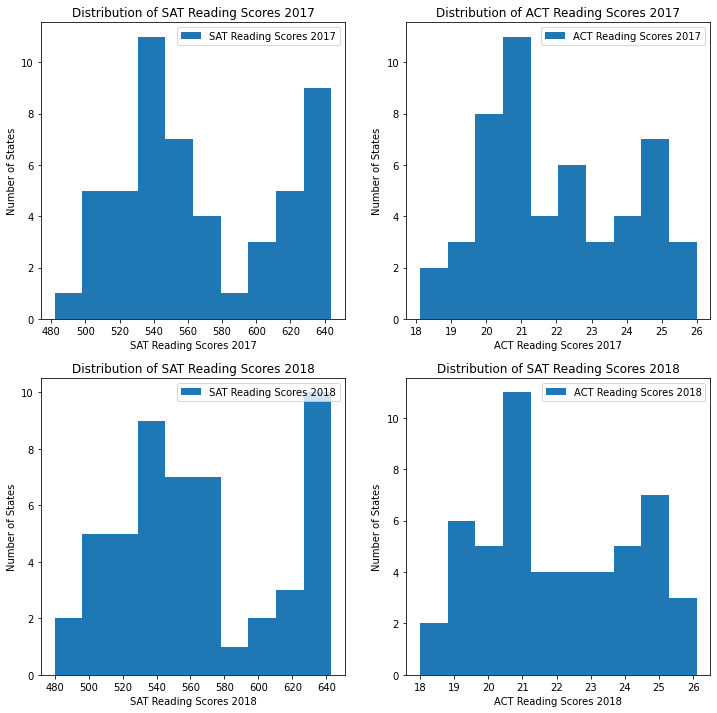

In [81]:
#create our df for the plot
reading=final.iloc[:,[2,8,12,18]]

subplot_histograms(reading,reading.columns.to_list(),[
    'Distribution of SAT Reading Scores 2017',
    'Distribution of ACT Reading Scores 2017',
    'Distribution of SAT Reading Scores 2018',
    'Distribution of SAT Reading Scores 2018'],[
    'SAT Reading Scores 2017',
    'ACT Reading Scores 2017',
    'SAT Reading Scores 2018',
    'ACT Reading Scores 2018'
])

#### Observation:

From 2017-2018:
- SAT reading scores seem to have increased. 
- ACT reading scores seems to have increased too. 

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


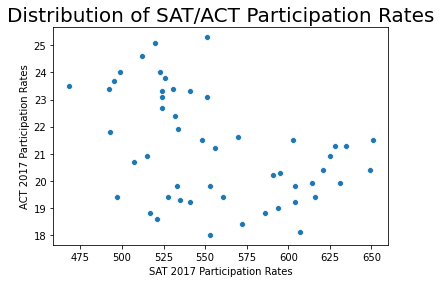

In [82]:
math_2017=math.iloc[:,[0,1]]
math_2017_scat=sns.scatterplot(x='sat_math_2017', y='act_math_2017', data=math_2017)
math_2017_scat.set_title('Distribution of SAT/ACT Participation Rates',fontsize=20)
math_2017_scat.set_xlabel('SAT 2017 Participation Rates')
math_2017_scat.set_ylabel('ACT 2017 Participation Rates');

#### Observation:
slight negative correlation observed in the scatterplot but not as obvious as -0.84

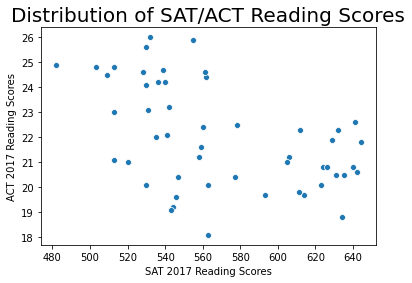

In [83]:
reading_2017=reading.iloc[:,[0,1]] #create dataframe for the data we need
reading_2017_scat=sns.scatterplot(x='sat_reading_writing_2017', y='act_reading_2017', data=reading_2017)
reading_2017_scat.set_title('Distribution of SAT/ACT Reading Scores',fontsize=20)
reading_2017_scat.set_xlabel('SAT 2017 Reading Scores')
reading_2017_scat.set_ylabel('ACT 2017 Reading Scores');

#### Observation:
slight negative correlation observed in the scatterplot

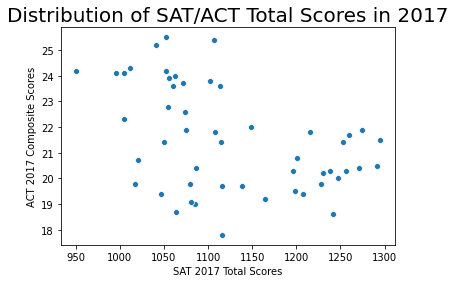

In [84]:
total_2017=final.iloc[:,[4,10]] #create dataframe for the data we need
total_2017_scat=sns.scatterplot(x='sat_total_2017', y='act_composite_2017', data=total_2017)
total_2017_scat.set_title('Distribution of SAT/ACT Total Scores in 2017',fontsize=20)
total_2017_scat.set_xlabel('SAT 2017 Total Scores')
total_2017_scat.set_ylabel('ACT 2017 Composite Scores');

#### Observation:
slight negative correlation observed in the scatterplot

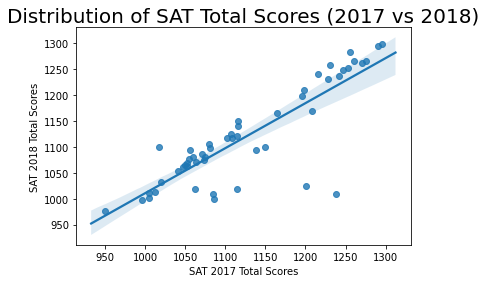

In [85]:
sat_total=final.iloc[:,[4,14]] #create dataframe for the data we need
sat_total_scat=sns.regplot(x='sat_total_2017', y='sat_total_2018', data=sat_total)
sat_total_scat.set_title('Distribution of SAT Total Scores (2017 vs 2018)',fontsize=20)
sat_total_scat.set_xlabel('SAT 2017 Total Scores')
sat_total_scat.set_ylabel('SAT 2018 Total Scores');

#### Observation:
strong positive correlation observed in the scatterplot

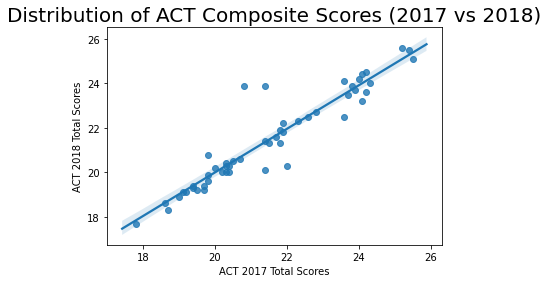

In [86]:
composite=final.iloc[:,[10,20]] #create dataframe for the data we need
composite_scat=sns.regplot(x='act_composite_2017', y='act_composite_2018', data=composite)
composite_scat.set_title('Distribution of ACT Composite Scores (2017 vs 2018)',fontsize=20)
composite_scat.set_xlabel('ACT 2017 Total Scores')
composite_scat.set_ylabel('ACT 2018 Total Scores');

#### Observation:
strong positive correlation observed in the scatterplot

### Overall observations of scatter plots
the scatter plots support the correlations seen in the heatmap above:
- negative correlations between SAT/ACT rates
- strong positive correlation between total/composite scores of the 2 years

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

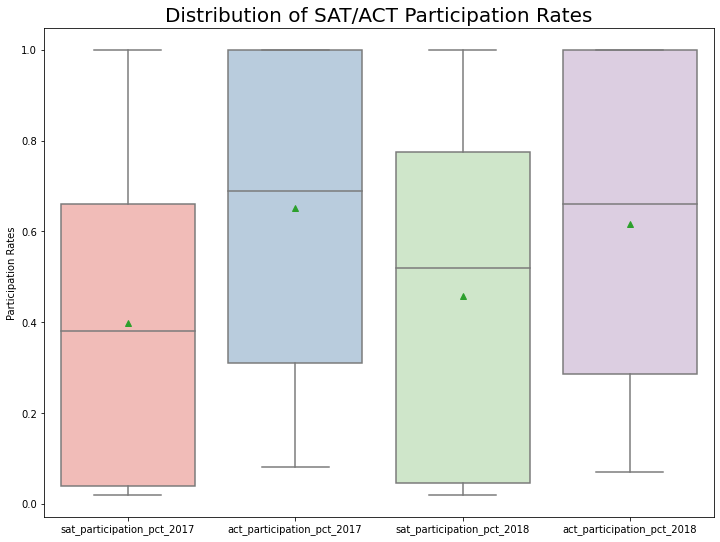

In [87]:
plt.figure(figsize=(12,9))
part_pct_box=sns.boxplot(data=part_pct,orient='v',palette='Pastel1',showmeans=True)
part_pct_box.set_title('Distribution of SAT/ACT Participation Rates',fontsize=20)
part_pct_box.set_ylabel('Participation Rates');

#### Observation:
ACT has higher mean participation in both years. however, it seems like SAT is closing the gap. It is increasing at a faster rate than ACT is. 

In [88]:
## plt.figure(figsize=(12,9))
## sat_total_box=sns.boxplot(data=total,orient='v',palette='Pastel2_r',showmeans=True);
## sat_total_box.set_title('Distribution of SAT Total Scores (2017-2018)',fontsize=20)
## sat_total_box.set_ylabel('Total Scores');

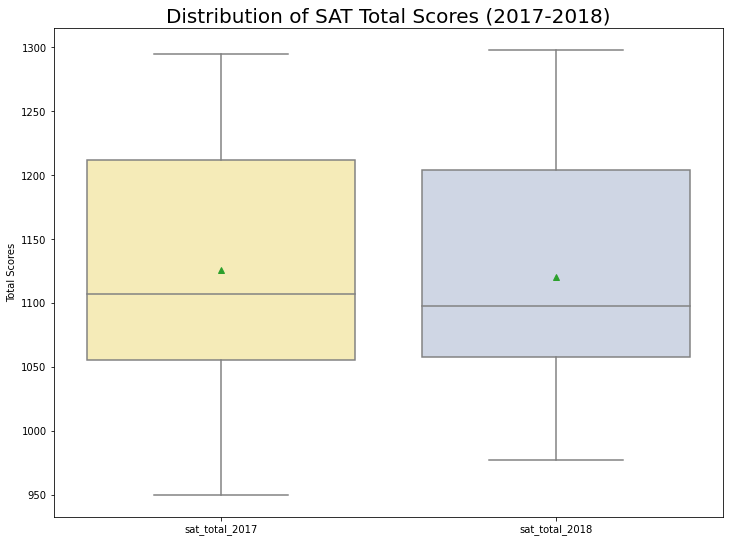

In [89]:
plt.figure(figsize=(12,9))
sat_total_box=sns.boxplot(data=sat_total,orient='v',palette='Pastel2_r',showmeans=True);
sat_total_box.set_title('Distribution of SAT Total Scores (2017-2018)',fontsize=20)
sat_total_box.set_ylabel('Total Scores');

#### Observation:
SAT total scores have remained relatively similar over the 2 years. This is supported by the histogram of the reading and math socres which have not changed over the 2 years. Both the scores are skewed to the right, with median less than mean. 

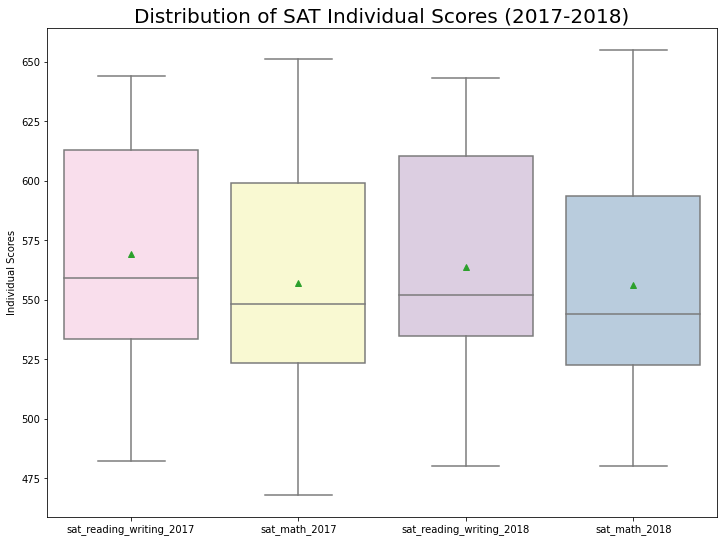

In [90]:
sat_scores=final.iloc[:,[2,3,12,13]]
plt.figure(figsize=(12,9))
sat_scores_box=sns.boxplot(data=sat_scores,orient='v',palette='Pastel1_r',showmeans=True)
sat_scores_box.set_title('Distribution of SAT Individual Scores (2017-2018)',fontsize=20)
sat_scores_box.set_ylabel('Individual Scores');

#### Observation:
This also reiterates the point above that SAT scores have not changed much over the 2 years

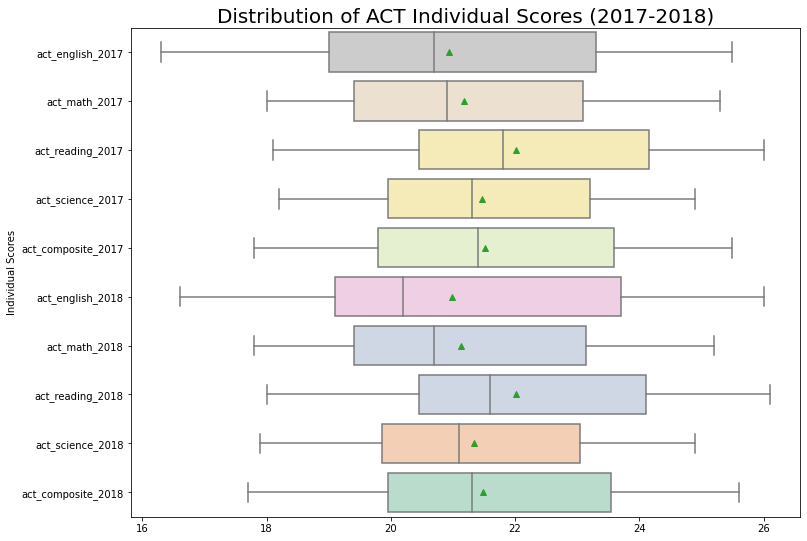

In [91]:
act=final.iloc[:,[6,7,8,9,10,16,17,18,19,20]]
plt.figure(figsize=(12,9))
act_scores_box=sns.boxplot(data=act,orient='h',palette='Pastel2_r',showmeans=True)
act_scores_box.set_title('Distribution of ACT Individual Scores (2017-2018)',fontsize=20)
act_scores_box.set_ylabel('Individual Scores');

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Text(0, 0.5, 'ACT Participation Rates')

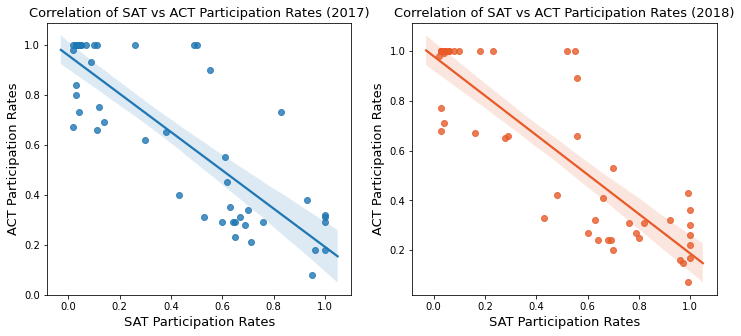

In [92]:
part=final.iloc[:,[1,5,11,15]]

f, axes = plt.subplots(1, 2,figsize=(12,5))
part_plt=sns.regplot(x='sat_participation_pct_2017', y='act_participation_pct_2017', data=part,ax=axes[0])
part_plt.set_title('Correlation of SAT vs ACT Participation Rates (2017)',fontsize=13)
part_plt.set_xlabel('SAT Participation Rates',fontsize=13)
part_plt.set_ylabel('ACT Participation Rates',fontsize=13)

part_plt=sns.regplot(x='sat_participation_pct_2018', y='act_participation_pct_2018', data=part,ax=axes[1],color='#E85B29')
part_plt.set_title('Correlation of SAT vs ACT Participation Rates (2018)',fontsize=13)
part_plt.set_xlabel('SAT Participation Rates',fontsize=13)
part_plt.set_ylabel('ACT Participation Rates',fontsize=13)

#plt.savefig('../images/part_scatter.png');

#### Further evidence to SAT Participation 2017 & 2018: 
The regression line further helps to support the inverse relationship observed in the scatter plot above. 

In [93]:
#part.corr()
part_2017=final.iloc[:,[1,5]]
part_2018=final.iloc[:,[11,15]]
#table of correlation between sat participation and act participation in 2017
part_2017.corr()

,sat_participation_pct_2017,act_participation_pct_2017
sat_participation_pct_2017,1.000000,-0.841234
act_participation_pct_2017,-0.841234,1.000000


In [94]:
#table of correlation between sat participation and act participation in 2017
part_2018.corr()

,sat_participation_pct_2018,act_participation_pct_2018
sat_participation_pct_2018,1.000000,-0.868103
act_participation_pct_2018,-0.868103,1.000000


#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

Since the diagrams above have shown that the distributions for each variable have not changed significantly, I will be describing each variable from 2017. 

##### sat_participation_pct_2017: 
The mean lies at around 39.8% while the median is at 38%. This means that the distribution is skewed to the right. The standard deviation is 0.35, which is quite huge in this context, indicating that there is a sizeable spread from the mean. This is further shown by the 1.0 range. 

##### sat_reading_writing_2017: 
The mean lies at around 569 while the median is at 559. Since the mean is more than the median, this means that the distribution is skewed to the right. The range is 162 and standard deviation is relatively large, indicating that there is a sizeable spread from the mean. 

##### sat_math_2017: 
The mean lies at around 556.9 while the median is at 548. Since the mean is more than the median, this means that the distribution is skewed to the right. The range is 183 and standard deviation is 47.1, indicating that there is a sizeable spread from the mean. 

##### sat_total_2017: 
The mean lies at around 1126 while the median is at 1107. Since the mean is more than the median, this means that the distribution is skewed to the right. The range is 345 and standard deviation is 92.5, indicating that there is a sizeable spread from the mean. 

##### act_participation_pct_2017: 
The mean lies at around 65% while the median is at 69%. Since the mean is less than the median, this means that the distribution is skewed to the left. The range is 92% and standard deviation is 32.%, indicating that there is a large spread from the mean. 

##### act_english_2017: 
The mean lies at around 20.9 while the median is at 20.7. Since the mean is more than the median, this means that the distribution is skewed slightly to the right. The range is 6.6 and standard deviation is 2.35, indicating that there is a fairly small spread from the mean. 

##### act_math_2017: 
The mean lies at around 21.2 while the median is at 20.9. Since the mean is more than the median, this means that the distribution is skewed to the right. The range is 7.3 and standard deviation is 1.98, indicating that there is a fairly small spread from the mean. 

##### act_reading_2017: 
The mean lies at around 22 while the median is at 21.8. Since the mean is more than the median, this means that the distribution is skewed to the right. The range is 7.9 and standard deviation is 2.07, indicating that there is a fairly small spread from the mean. 

##### act_science_2017: 
The mean lies at around 21.46 while the median is at 21.3. Since the mean is more than the median, this means that the distribution is skewed to the right. The range is 6.7 and standard deviation is 1.75, indicating that there is a small spread from the mean.

##### act_composite_2017: 
The mean lies at around 21.5 while the median is at 21.4. Since the mean is more than the median, this means that the distribution is slightly skewed to the right. The range is 7.2 and standard deviation is 2.02, indicating that there is a small spread from the mean. 

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: Yes. Based on the histograms and the statistics above, we have seen the data above vaguely resembles a normal distribution, skewed either left or right. With a larger sample could exhibit CLT. 

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

##### Math & Reading
The math and reading scores vaguely resembles a normal distribution, with a right skew. We can take the mean of samples of the mean scores across each of the 51 states, giving us the sampling distribution of the mean scores. Due to CLT, the sampling distribution will approximate to the normal distribution. 

#### Rates
These are further from normal. There are 2 peaks in each of the distributions. This is because rates is not a form of aggregate data of the participants instead just the rate of a single state. Not being to perform a sampling distribution of the mean, means that CLT will not observed here. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:
It does not make sense in this case.
Participation rates do not account for population size since a the number of participants of a state with 100% participation rate could be less than another with a 50% rate.  

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: Given that the math scores of both tests are of the same granularity and are aggregated data, yes. However, there are still many differences between the math tests that would have to be looked into to consider if this is a fair compairison. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [95]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

- Illinois
- Colorado

These 2 states showed dramatic swings in their participation rates from 9% and 11% to 99% and 100% respectively. Upon further research, we have found that in these 2 states, the SAT won tenders from the local government who have made SAT testing compulsory for all high school juniors. In addition, these test are provided at no addtional cost to the students. 
This has proven to be effective not just in SAT mandated states but also a large amount of ACT mandated states. There are a total of 17 states with 100% participation rates and all of them are ACT mandated.

Special mention to Colorado which switched from ACT mandated to SAT mandated.

- Hawaii

Hawai, being an ACT mandated state, has a high ACT participation rate and yet notably, the SAT participation rate is at around 55%. This is unusual, given our highly negatively correlated correlation between SAT and ACt participation rates. Unfortunately, I wasnt able to find out more on the state policies or colleges requirements in the state that could have influenced the rates. 


sources:

https://www.testive.com/illinois/

https://www.testive.com/colorado-sat-change-2017/

https://www.testive.com/state-sat-act/

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

I recommend for the College Board to increase participation by:
- Approaching local governments to mandate SAT testing for all high school juniors
- providing fee waivers for SAT Testing

I recommend for the college board to focus their efforts on West Virginia. 
West Virgina is the poorest state in the USA as of 2018, according to investopedia. At the same time, it is not an ACT mandated state and has a low SAT participation rate. 

Since forking out test fees are a concern for high acheiveing yet low income students, it is possible to increase the participation rates.

sources:
https://www.hanoverresearch.com/media/Best-Practices-to-Increase-SAT-Participation-1.pdf
https://www.investopedia.com/articles/markets/080116/americas-poorest-states-2016.asp